Using the API of the Cour de Cassation, we extracted all decisions rendered by the court in the timeframe 01.01.2018 to 01.01.2023 which are related to EU Law. For determining the decisions which are related to EU Law we have used the following keywords: (i) Règlement UE (ii) Directive (iii) Charte des droits fondamentaux de l'Union Européenne (iv) TFUE (v) Traité sur le fonctionnement de l'Union européenne (vi) "Traité sur l'Union européenne.

Then we created the following dataframe:

In [2]:
#New API

from requests_oauthlib import OAuth2Session
from bs4 import BeautifulSoup
import requests
import pandas as pd
import json
import regex as re
import urllib.parse

API_HOST = "https://sandbox-api.aife.economie.gouv.fr"
TOKEN_URL = 'https://sandbox-oauth.aife.economie.gouv.fr/api/oauth/token'
client_id = "b800ee81-4b08-4b7c-9cb6-67f51535888e"
client_secret = "0adff97c-722d-40aa-bbd6-3e32a08c6ae3"

tokencall = requests.post(TOKEN_URL, data={"grant_type": "client_credentials","client_id": client_id, "client_secret": client_secret, "scope": "openid"})

token = tokencall.json()
client = OAuth2Session(client_id, token=token)


keywords = ["règlement UE", "directive", "CHARTE DES DROITS FONDAMENTAUX DE L'UNION EUROPÉENNE", "TFUE", "Traité sur le fonctionnement de l'Union européenne", "Traité sur l'Union européenne"]


import urllib.parse

all_df = []
for key in keywords:
    base_url = "https://sandbox-api.piste.gouv.fr/cassation/judilibre/v1.0/search?query=" + urllib.parse.quote(
        key) +  "&date_start=2018-01-01&date_end=2023-01-01&page_size=50&page="

    df = ["", ""]
    ii = 0
    while len(df) > 0 and ii < 150:

        resp = client.get(base_url + str(ii))
        results = resp.json()
        df = pd.DataFrame(results["results"])
        df['keyword'] = key
        all_df.append(df)
        ii += 1
france_df = pd.concat(all_df)

print(france_df)

       score                                         highlights  \
0   1.000000  {'text': ['ou conservatoires sur le fondement ...   
1   0.951424  {'text': ['<em>UE</em> n° 1215/2012 du 12 déce...   
2   0.935280  {'text': ['clairé quant aux <em>règles</em> de...   
3   0.927634  {'text': ['<em>UE</em> n° 1215/2012 du 12 déce...   
4   0.926627  {'text': ['K..., la cour d'appel a violé l'art...   
..       ...                                                ...   
45  0.000533  {'text': ['COUR DE CASSATION, DEU…IÈME CHAMBRE...   
46  0.000533  {'text': ['COUR DE CASSATION, DEU…IÈME CHAMBRE...   
47  0.000533  {'text': ['en litige, de la somme dont la rest...   
48  0.000533  {'text': ['travail effectif ; qu'en second lie...   
49  0.000533  {'text': ['la caisse) une demande d'accord pré...   

                          id jurisdiction chamber     number  \
0   5fca97e33af51f8cc4798830           cc    civ1  16-19.731   
1   62a9778dc8dc0d05e55423e3           cc    civ1  21-10.742   
2  

In [ ]:
import re

u_law_regex = re.compile(r'(?i)(?:(?:"directive" [\w/;-]+)|(?:"règlement UE" n° [\w/;-]+)|(?:"la charte des droits fondamentaux de l\'Union européenne")|(?:"CJUE, \d+ \w+ \d+, [\w,.-]+"))')

matching_summaries = df[df['summary'].str.contains(u_law_regex, na=False)]

for index, row in matching_summaries.iterrows():
    print(f"Checking row {index}:")
    print(row['summary'])


In [ ]:
pip install seaborn matplotlib

In [ ]:
pip install textblob

Sentiment analysis on the summary of the decisions of the Cour de Cassation

Here we used the TextBlob library to analyze the sentiment (polarity and subjectivity) of French text of the summary of each deicision.

For us:
(i) We replaced any NaN values in the 'summary' column of the DataFrame df with an empty string.
(ii) The summary analysis terates through each row of the DataFrame (df) and extracts the text from the 'summary' column. It then uses TextBlob to convert the text into a TextBlob object, which is necessary for sentiment analysis. The sentiment (polarity and subjectivity) of each text is computed using TextBlob's sentiment method.
(iii) The sentiment scores are apended into the "sentiment_score" list and then a "sentiment_df" dataframe is created

In [ ]:
from textblob import TextBlob
import pandas as pd
import numpy as np

france_df['summary'].replace(np.nan, '', inplace=True)

sentiment_scores = []

for index, row in france_df.iterrows():
    text = row['summary']
    blob = TextBlob(str(text))
    sentiment = blob.sentiment
    sentiment_scores.append((text, sentiment.polarity, sentiment.subjectivity))

sentiment_df = pd.DataFrame(sentiment_scores, columns=['Text', 'Polarity', 'Subjectivity'])

print(sentiment_df)


                                                    Text  Polarity  \
0      Aux termes de l'article 35 du règlement (UE) n...    0.0000   
1      Il résulte de de l'article 7, § 2, du règlemen...    0.1000   
2      L'article 5 du règlement (UE) n° 1259/2010 du ...    0.0000   
3      Par l'arrêt CJUE, arrêt du 21 décembre 2021, G...    0.2375   
4      Par arrêt du 17 octobre 2017 (C-194/16 Svensk ...    0.0000   
...                                                  ...       ...   
32907                                                       0.0000   
32908                                                       0.0000   
32909                                                       0.0000   
32910                                                       0.0000   
32911                                                       0.0000   

       Subjectivity  
0            0.0000  
1            0.1000  
2            0.0000  
3            0.2375  
4            0.0000  
...             ...  
32907

Then, we used the matplotlib to create a scatted plot based on sentiment analysis results.

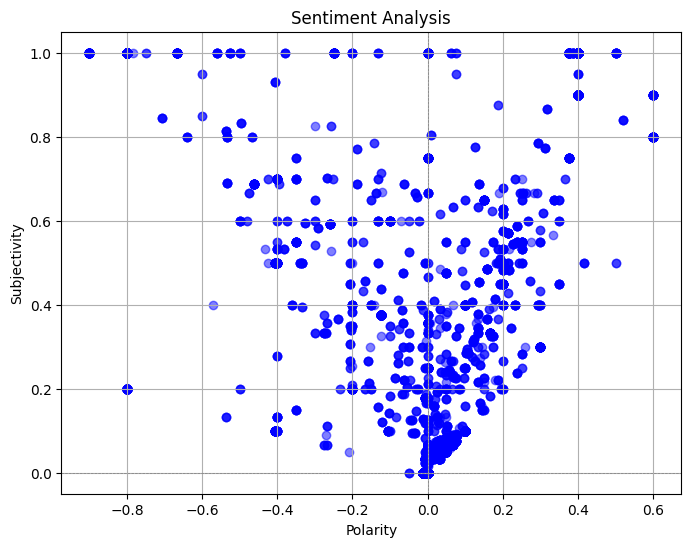

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(sentiment_df['Polarity'], sentiment_df['Subjectivity'], color='blue', alpha=0.5)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.show()


Here, we have use the Matplotlib to create a scatter plot that visualizes the number of decisions rendered each year based on the 'decision_date' column in a "france_df" Data Frame

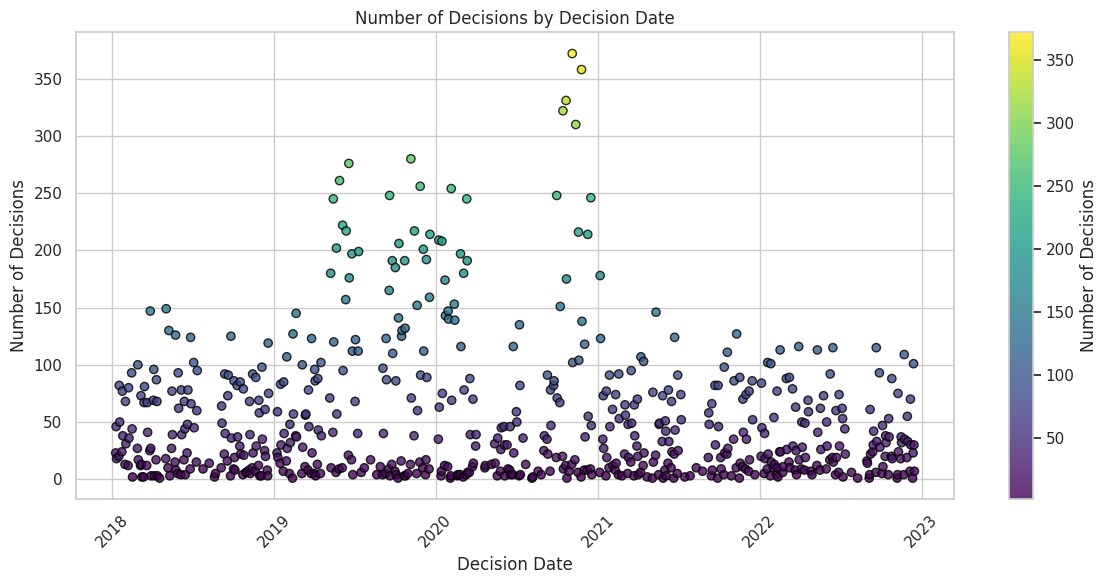

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

france_df['decision_date'] = pd.to_datetime(france_df['decision_date'])

date_counts = france_df['decision_date'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.scatter(date_counts.index, date_counts.values, c=date_counts.values, cmap='viridis', alpha=0.8, edgecolors='black')
plt.title('Number of Decisions by Decision Date')
plt.xlabel('Decision Date')
plt.ylabel('Number of Decisions')
plt.xticks(rotation=45)
plt.colorbar(label='Number of Decisions')
plt.tight_layout()
plt.show()



This code uses Matplotlib to create a bar plot that visualizes the number of decisions rendered before and after the start of the COVID-19 era, based on the 'decision_date' column.

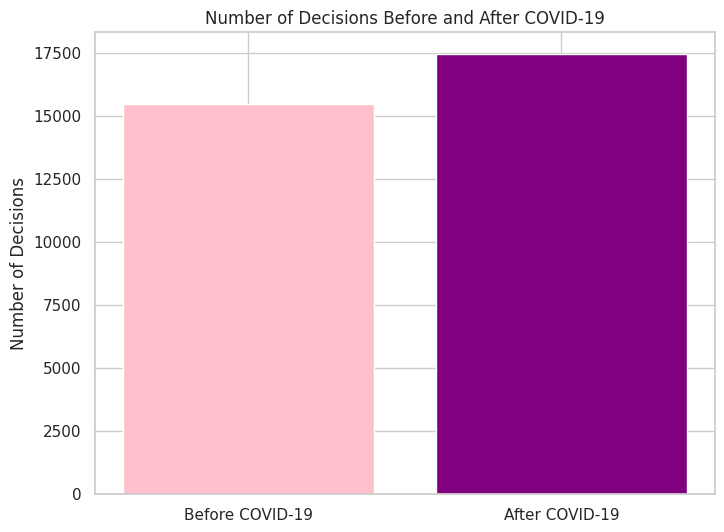

In [ ]:
#Before and after Covid decisions

import matplotlib.pyplot as plt

france_df['decision_date'] = pd.to_datetime(france_df['decision_date'])

covid_start_date = pd.to_datetime('2020-01-01')

decisions_before_covid = france_df[df['decision_date'] < covid_start_date].shape[0]
decisions_after_covid = france_df[df['decision_date'] >= covid_start_date].shape[0]

plt.figure(figsize=(8, 6))
plt.bar(['Before COVID-19', 'After COVID-19'], [decisions_before_covid, decisions_after_covid], color=['pink', 'purple'])
plt.title('Number of Decisions Before and After COVID-19')
plt.ylabel('Number of Decisions')
plt.show()



Using the seaborn and matplotlib libraries we plotted a pie chart which illustrates the distribution of the types of EU law mostly reffered to in the decisions of the Cour de Cassation. The code looks at the keywords(réglement, directive,TFUE etc) we intially used when we filtered the database of the decisions.

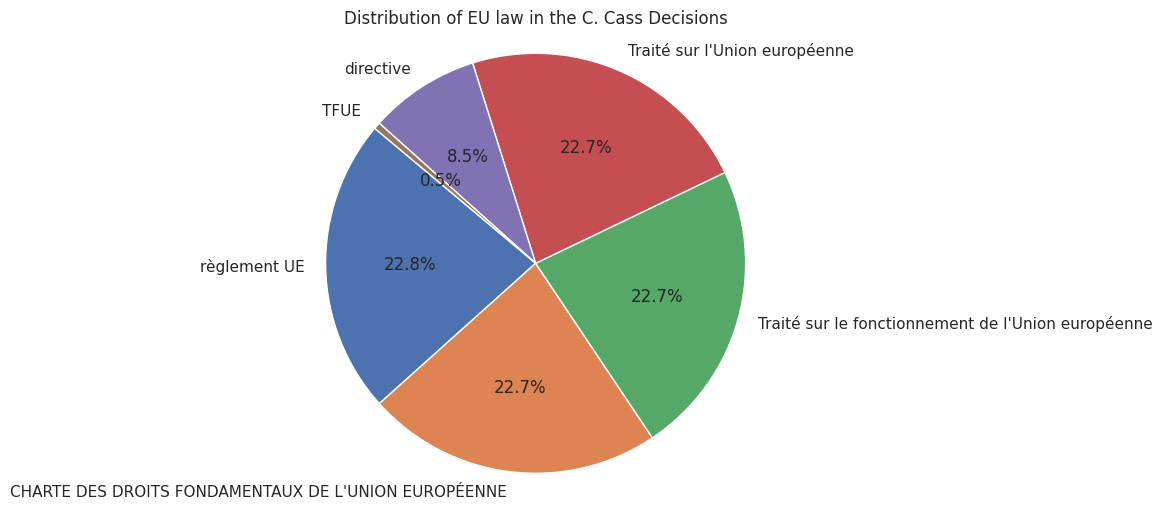

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

keyword_counts = france_df['keyword'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(keyword_counts, labels=keyword_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of EU law in the C. Cass Decisions')
plt.axis('equal')
plt.show()

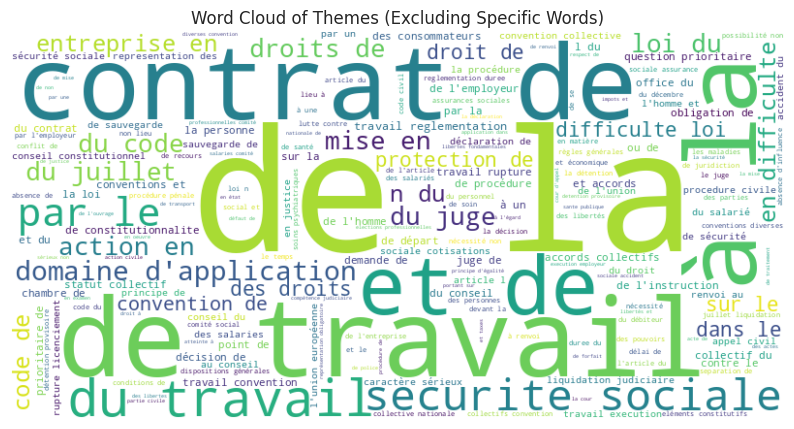

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import itertools

excluded_words = ["preuve", "appréciation", "délai", 'union europeenne', "détermination", "portée",
                  "cas", "applications diverses", "défaut", "critères", "caractérisation", "condition",
                  "effets", "etendue", "application", "contenu", "conditions", "exclusion", "définition",
                  "possibilité", "effet", "de", "la", "à","du", "de la", "et"]

filtered_themes = france_df['themes'].dropna()
filtered_themes = filtered_themes.apply(lambda x: [word for word in x if word.lower() not in excluded_words])

all_themes = list(itertools.chain.from_iterable(filtered_themes))

all_themes_str = ' '.join(map(str, all_themes))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_themes_str)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Themes (Excluding Specific Words)')
plt.show()



The code generates a KDE (Kernel Density Estimate) plot using Seaborn's kdeplot(), utilizing the 'year' as the x-axis, 'keyword' as the hue, and stacks multiple densities while filling the areas under the curves. The resulting plot visualizes the density distribution of EU legal instruments over the years.

Legend:

Règlement UE = orange
Directive = pink
Charte des droits fondamentaux de l'UE= blue
Traité sur l'Union européenne =green
Traité sur le fonctionnement de l'Union européenne= yellow
TFEU = purple

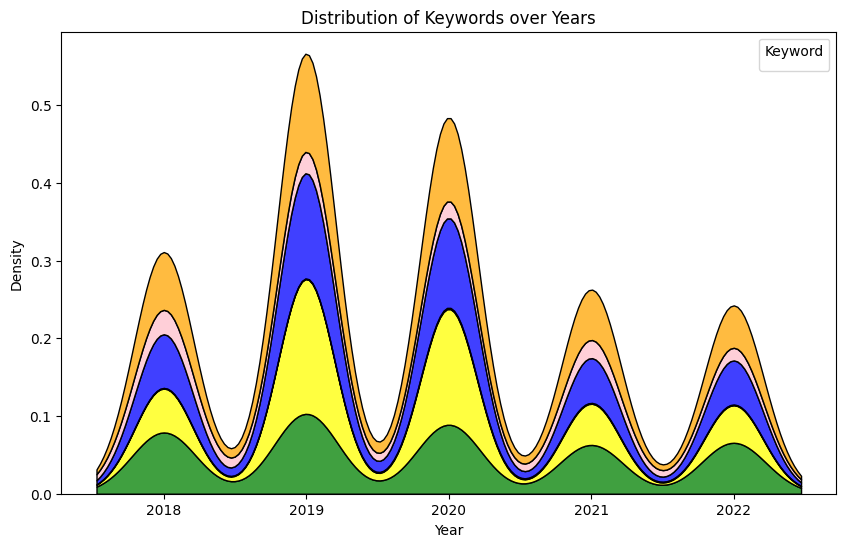

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

france_df['year'] = pd.to_datetime(france_df['decision_date']).dt.year

color_mapping = {
    'directive': 'pink',
    "CHARTE DES DROITS FONDAMENTAUX DE L'UNION EUROPÉENNE": 'blue',
    "Traité sur l'Union européenne": 'green',
    "Traité sur le fonctionnement de l'Union européenne": 'yellow',
    'règlement UE': 'orange',
    'TFUE': 'purple'
}

plt.figure(figsize=(10, 6))
sns.kdeplot(data=france_df, x='year', hue='keyword', multiple='stack', fill=True, palette=color_mapping)
plt.title('Distribution of Keywords over Years')
plt.xlabel('Year')
plt.ylabel('Density')
plt.legend(title='Keyword')
plt.show()



In [ ]:
#Create a dataframe with the URL of each decision

decision_urls = []

for index, row in df.iterrows():
    decision_id = row['id']  # Replace 'id' with the actual column name containing decision IDs
    decision_url = f"https://www.courdecassation.fr/decision/{decision_id}"
    decision_urls.append(decision_url)

# Add the decision URLs to the DataFrame
df['decision_url'] = decision_urls

# Now, df contains a new column 'decision_url' with the constructed URLs
print(df['decision_url'])

0     https://www.courdecassation.fr/decision/5fca97...
1     https://www.courdecassation.fr/decision/62a977...
2     https://www.courdecassation.fr/decision/61f0f2...
3     https://www.courdecassation.fr/decision/62a977...
4     https://www.courdecassation.fr/decision/5fca58...
                            ...                        
45    https://www.courdecassation.fr/decision/5fca90...
46    https://www.courdecassation.fr/decision/61e665...
47    https://www.courdecassation.fr/decision/5fca70...
48    https://www.courdecassation.fr/decision/5fca4b...
49    https://www.courdecassation.fr/decision/5fca78...
Name: decision_url, Length: 32911, dtype: object


In [ ]:
pd.set_option('display.max_colwidth', None)
print(df["themes"])


0                                                                                                                                                                                                                                                                                                                          [union europeenne, règlement (ue) n° 1215/2012 du parlement européen et du conseil du 12 décembre 2012, article 35, mesures provisoires ou conservatoires, juridiction compétente, détermination]
1                                                                                                                                          [union europeenne, coopération judiciaire en matière civile, compétence judiciaire, reconnaissance et exécution des décisions, règlement (ue) n° 1215/2012 du parlement européen et du conseil du 12 décembre 2012, matière délictuelle ou quasi-délictuelle, préjudice purement financier, compétence des juridictions françaises, exclusion, conditions, déter

In [ ]:
import pandas as pd
import numpy as np


exploded_themes = france_df['themes'].explode()


theme_counts_before_exclusion = exploded_themes.value_counts()
print("Before exclusion:")
print(theme_counts_before_exclusion.head(50))

# List of terms to exclude
excluded_terms = ["preuve", "appréciation", "délai", 'union europeenne', "détermination", "portée", "cas", "applications diverses", "défaut", "critères", "caractérisation", "condition", "effets", "etendue", "application", "contenu", "conditions", "exclusion", "définition", "possibilité", "effet"]

filtered_themes = exploded_themes[~exploded_themes.isin(excluded_terms)]


theme_counts_after_exclusion = filtered_themes.value_counts()
print("\nAfter exclusion:")
print(theme_counts_after_exclusion.head(50))

# Get the unique values from the exploded 'themes' column
unique_themes = exploded_themes.unique()

print("\nUnique themes:")
print(unique_themes)


Before exclusion:
portée                                               4224
détermination                                        3143
conditions                                           2488
cas                                                  2344
exclusion                                            1562
défaut                                               1241
effets                                               1083
domaine d'application                                 909
applications diverses                                 853
procédure                                             751
définition                                            689
etendue                                               657
nécessité                                             571
entreprise en difficulte (loi du 26 juillet 2005)     569
modalités                                             471
securite sociale                                      457
recevabilité                                          

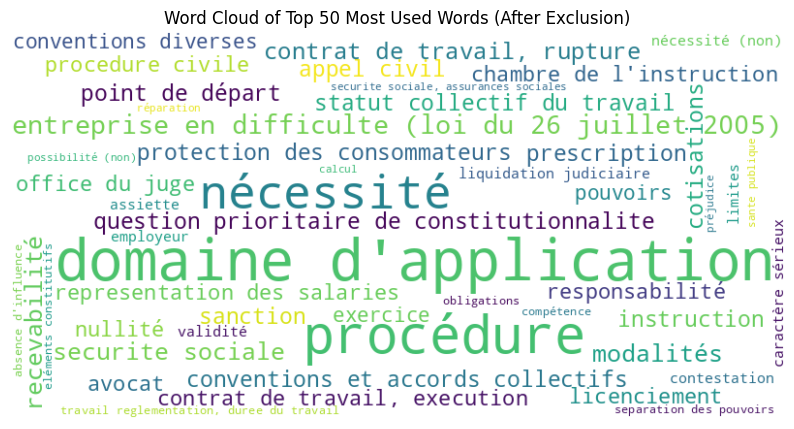

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Convert the Pandas Series (filtered_themes) to a dictionary with word frequencies
word_freq_dict = filtered_themes.value_counts().to_dict()


wordcloud_filtered = WordCloud(width=800, height=400, max_words=50, background_color='white').generate_from_frequencies(word_freq_dict)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_filtered, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top 50 Most Used Words (After Exclusion)')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming you have the variable unique_themes containing the unique themes

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(unique_themes))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

NameError: ignored

In [ ]:
# Print the frequency of each keyword (EU instrument)

keyword_counts = france_df['keyword'].value_counts()

print(keyword_counts)

règlement UE                                            7488
CHARTE DES DROITS FONDAMENTAUX DE L'UNION EUROPÉENNE    7483
Traité sur le fonctionnement de l'Union européenne      7482
Traité sur l'Union européenne                           7481
directive                                               2804
TFUE                                                     170
Name: keyword, dtype: int64
